**# House Price Prediction**

## Data Preprocessing and feature engineering

**Author** - `Prasad Parjane`

**Source**-(https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

**Objective** - To predict the sales price of each house using the feature engineering and advanced regression techniques like random forest and gradient boosting



In [ ]:
# import required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **STEP 1 : LOAD THE DATASET AMD INSPECTION OF DATASET**

Importing the required python libraries. Thereafter loading the dataset and inspecting the dataset by printing the first 5 rows of the dataset

DATASET : 
1. test.csv
2. train.csv

In [ ]:
df = pd.read_csv(r"C:\Users\Asus Vivobook 15\Desktop\CSI\Week5_Assignment\Data_Files\train.csv")
print(f"Shape of the dataset: {df.shape}")

print("\nColumns in the dataset:")
df.info()

print("\nFirst few rows of the dataset:")
print(df.head())

## **STEP 2: ANALYZING THE MISSING VALUES**

Analyzing the missing helps us to know the missing values and required cleaning. It helps to ensure training and working the model without any errors.

METHODS HANDLING THE MISSING VALUES AND COLUMNS
1. Dropping if they are not informative
2. Imputing if they contain useful but incomplete information.

In [8]:
print("Null Value statistics of the dataset:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Null Value statistics of the dataset:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## **Step 3: Handling Missing Values**

We address the missing values in a strategic way based on the proportion of missingness and the nature of each column:

1. DROP COLUMNS 
- `PoolQC, MiscFeature, Alley, Fence`: Over 75% missing values, low correlation with SalePrice, so we drop these columns.

2. Categorical Columns – Fill with 'None':
- Columns like `FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual,` etc., indicate absence when missing. We'll fill these with 'None'.

3. Numerical Columns – Fill with 0:
- `GarageYrBlt, MasVnrArea, BsmtFinSF1, etc.` can be filled with 0 when the feature is absent.

4. Numerical Column – Fill with Median:
- `LotFrontage`: Impute using median grouped by Neighborhood.

**This step ensures a clean dataset ready for feature engineering and modeling.**

In [9]:
# Drop high-missing columns
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

# Fill categorical columns with 'None'
categorical_none = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                    'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
df[categorical_none] = df[categorical_none].fillna("None")

# Fill numerical columns with 0
numerical_zero = ['GarageYrBlt', 'MasVnrArea']
df[numerical_zero] = df[numerical_zero].fillna(0)

# Fill LotFrontage with median based on Neighborhood
df['LotFrontage'] = df.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill Electrical with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [10]:
print("\nNull Value statistics after handling:")
missing_values_after = df.isnull().sum()
missing_values_after = missing_values_after[missing_values_after > 0].sort_values(ascending=False)
print(missing_values_after)


Null Value statistics after handling:
Series([], dtype: int64)


## ** STEP 4 - EXPLORATORY DATA ANALYSIS (EDA) **
We'll perform univariate and bivariate analysis using visualizations like histograms, boxplots, scatter plots, and correlation heatmaps. These help us understand the data distribution and how various features relate to the target variable `SalePrice`.


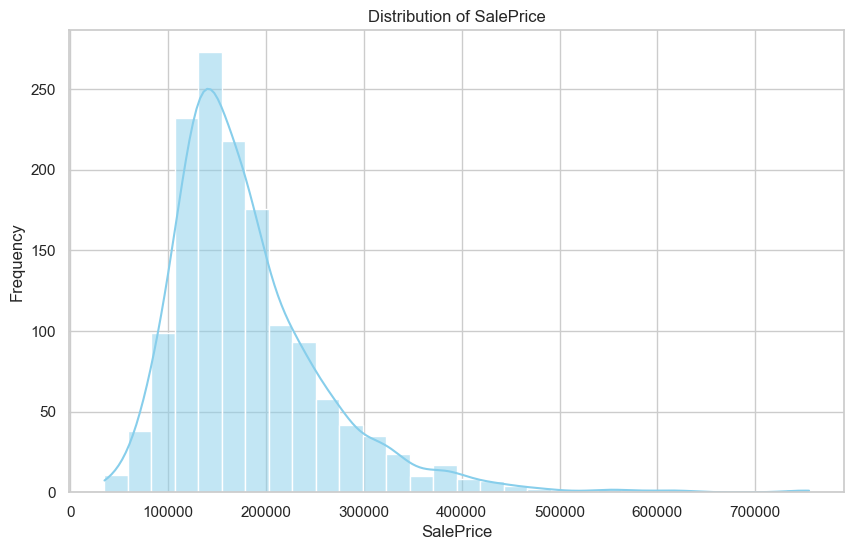

In [11]:
# 4.1 Visualizing the distribution of SalePrice
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_21220\2921757.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='Pastel2')


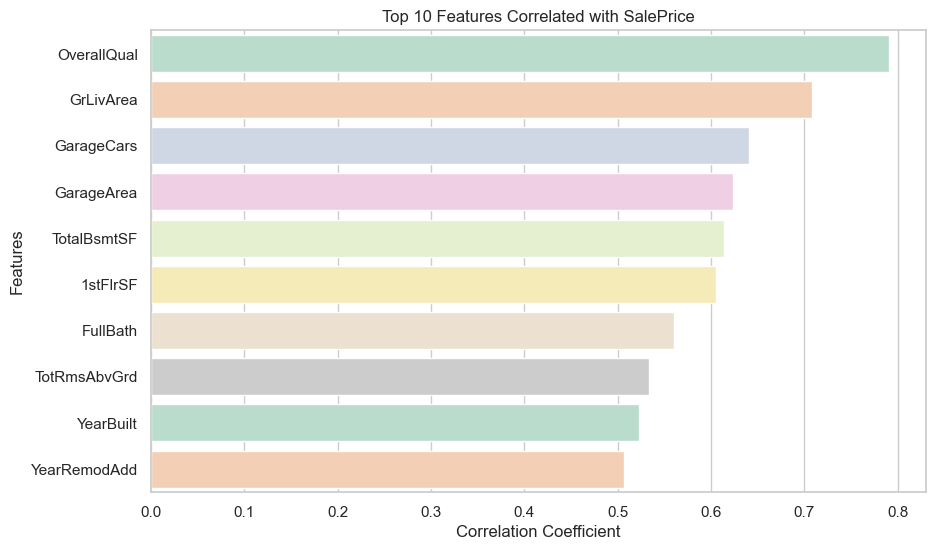

In [22]:
# 4.2) Visualizing the correlation of features with SalePrice
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

top_corr = correlation[1:11]  # Exclude 'SalePrice' itself

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='Pastel2')
plt.title('Top 10 Features Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()



**## *Observations of Step 4.1 and 4.2:***

SalePrice is right-skewed, indicating that most houses are priced lower, with a few high-value outliers.
Features like GrLivArea, TotalBsmtSF, and GarageCars, show a positive correlation with SalePrice.

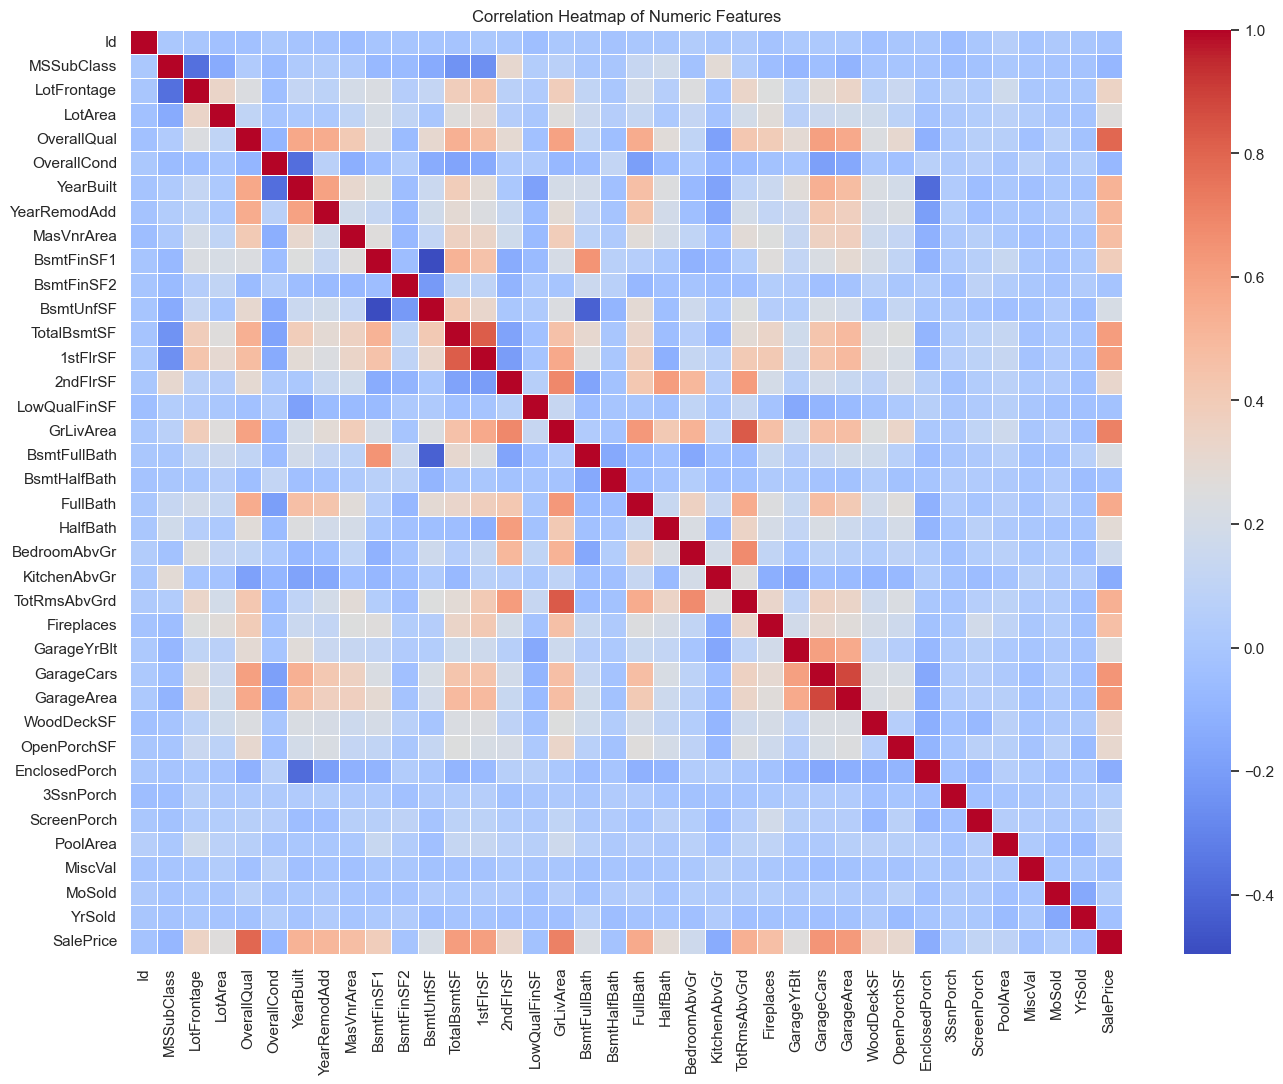

In [35]:
# 4.3) Visualizing the correlation heatmap of numeric features
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## **Step 4.4: Feature-wise Univariate and Bivariate Analysis**

We'll visualize the top features that correlate with `SalePrice` to better understand their distributions and relationships with the target variable. Both numerical and categorical features will be included.

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_21220\3688513441.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='Spectral')


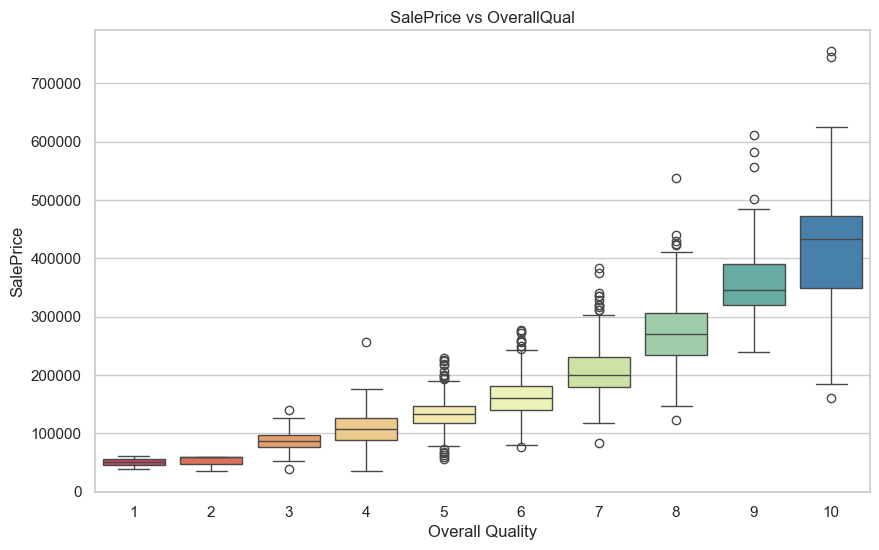

In [30]:
# A) OverallQual vs SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df, palette='Spectral')
plt.title('SalePrice vs OverallQual')
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.show()

- There's a clear positive relationship: as OverallQual increases, so does SalePrice.
- Higher quality houses command significantly higher prices, especially from quality level 6 onwards. 

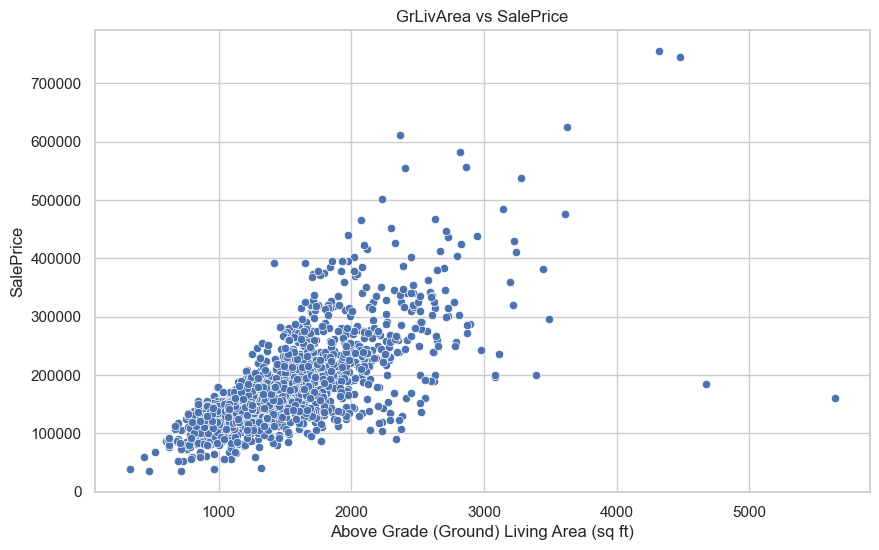

In [31]:
# B) GrLivArea vs SalePrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Above Grade (Ground) Living Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()

- A positive linear trend is visible.
- There are a few outliers with very high living area but relatively lower prices.
- These points may affect regression-based models, and may be considered for removal or transformation.

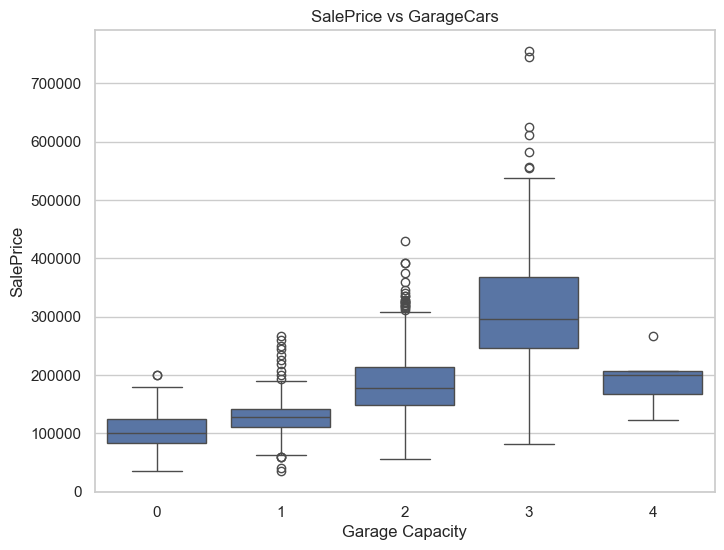

In [32]:
# C) GarageCars vs SalePrice

plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('SalePrice vs GarageCars')
plt.xlabel('Garage Capacity')
plt.ylabel('SalePrice')
plt.show()

- SalePrice tends to increase with the number of garage cars up to 3.
- Properties with 4+ garages show wider variance, possibly due to luxury-level custom homes.

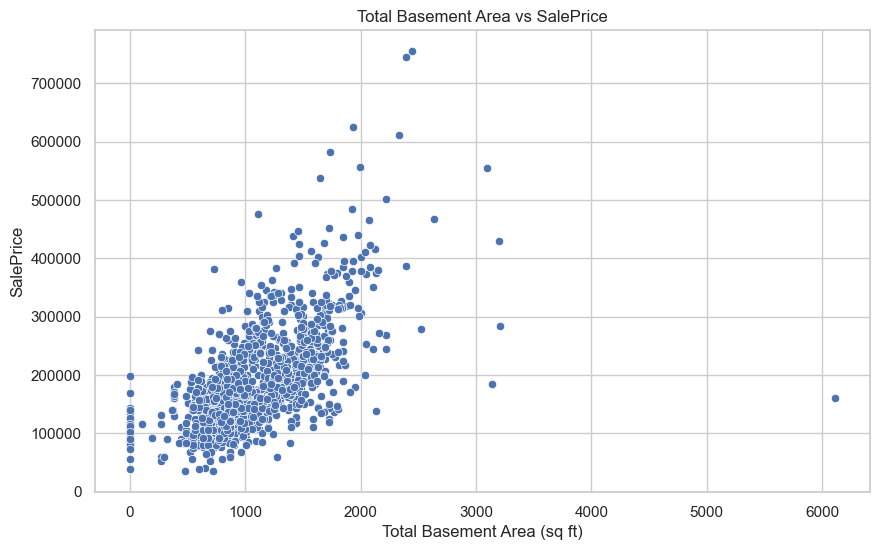

In [33]:
# D) TotalBsmtSF vs SalePrice

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('Total Basement Area vs SalePrice')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('SalePrice')
plt.show()

- A moderate positive relationship exists.
- A few high-basement properties appear as outliers, likely affecting model performance if not handled.

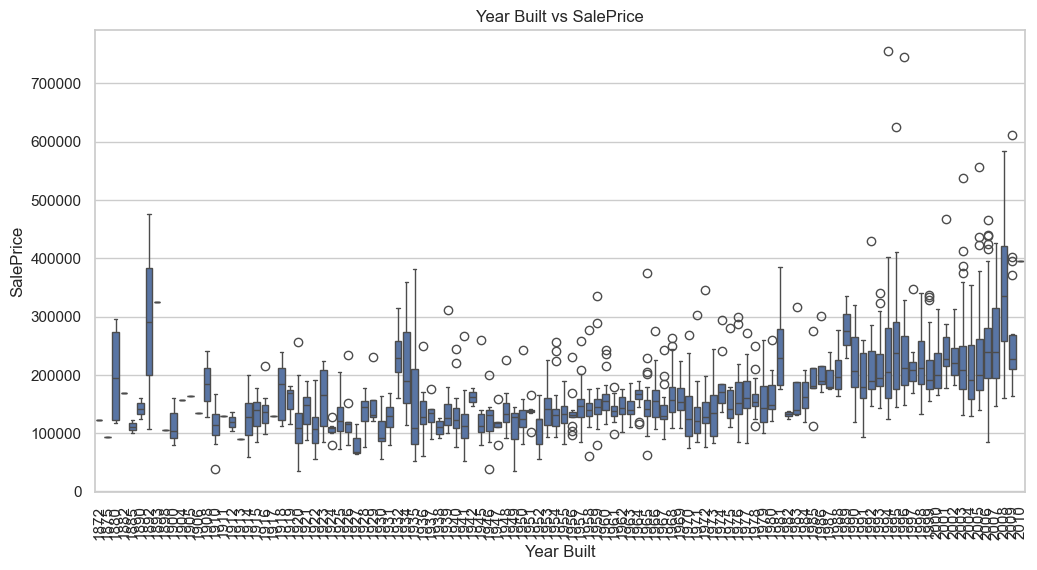

In [34]:
# E) YearBuilt vs SalePrice

plt.figure(figsize=(12, 6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Year Built vs SalePrice')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.show()

- Newer houses tend to sell for more.
- Homes built after 2000 show notably higher median prices.
- Consistent rise in price with newer construction year.

# **Step 5: Encoding Ordinal Categorical Features**

Several features in the dataset are ordinal in nature — they have a meaningful order, but are stored as categorical (string) values. To make these useful for machine learning models, we map them to numerical scales.

**Features transformed in this step:**

ExterQual, ExterCond: Exterior material quality and condition
HeatingQC: Heating system quality
KitchenQual: Kitchen quality
FireplaceQu: Fireplace quality

**Each quality rating is mapped as:**

Ex: 5 (Excellent)
Gd: 4 (Good)
TA: 3 (Typical/Average)
Fa: 2 (Fair)
Po: 1 (Poor)
NaN: 0 (No value)

In [36]:
quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}

for col in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu']:
    df[col] = df[col].map(quality_map)

**# Step 6: Handling Remaining Missing Values**
To ensure we can pass clean data into our model, we must address the remaining missing values. Here's how we handled different types:

`LotFrontage`: Since this is a numeric feature with ~259 missing values, we fill missing values using the median LotFrontage grouped by neighborhood, assuming similar neighborhood layouts.

`Electrical`: Only one missing value; we fill it with the mode (most frequent category).

These imputation strategies maintain the integrity of the data while minimizing information loss.

In [37]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

C:\Users\Asus Vivobook 15\AppData\Local\Temp\ipykernel_21220\3715872813.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)


**# Step 7: Creating New Features**

New features often capture useful domain relationships and provide signals that raw features alone may not. We added the following:

`TotalSF`: Total square footage (basement + 1st + 2nd floor)
`TotalBath`: Combined bathroom count, treating half-baths as 0.5
`HasPool`: Binary flag indicating presence of pool
`HouseAge`: Number of years since the house was built
`RemodAge`: Number of years since the last remodel

These engineered features are expected to help the model learn important patterns related to housing value.

In [38]:

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# **Step 8: Encoding Nominal Categorical Variables**

While ordinal variables can be mapped to numerical values directly, `nominal categorical variables` (those without any inherent order) must be handled differently.

We apply `One-Hot Encoding` to these features to convert each category into a separate binary column. This ensures the model treats all categories equally, without assuming any order or hierarchy.

**Key Points:**

- One-hot encoding is suitable for nominal variables such as MSZoning, Street, SaleCondition, Neighborhood, etc.
- It increases dimensionality but prevents the model from making false assumptions based on numeric mappings.
- We drop the first column for each variable (drop_first=True) to avoid multicollinearity.
- This step ensures that all categorical variables are now numerical and ready for machine learning models.

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# ✅ Load your CSV file (fix path properly)
df = pd.read_csv(r"C:\Users\Asus Vivobook 15\Desktop\CSI\Week5_Assignment\Data_Files\train.csv")

# ✅ Now this will work because df is defined
categorical_cols = df.select_dtypes(include='object').columns

print(f"Categorical columns to encode: {len(categorical_cols)}")
print(list(categorical_cols))


Categorical columns to encode: 43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [5]:

# Use pandas get_dummies for simplicity (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"New shape after encoding: {df_encoded.shape}")

New shape after encoding: (1460, 246)


New shape after encoding: (1460, 239)

**# Step 9: Feature Scaling (Standardization)**

Before feeding data into models like Linear Regression or Ridge, we need to scale our numerical features.

- Scaling centers the data around 0 and gives it unit variance.
- This helps in faster convergence and more reliable coefficient interpretation.
- We do not scale the target column (SalePrice).

We use `StandardScaler` to scale only numeric features.

In [6]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print(f"Final shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
X.head()

Final shape of features (X): (1460, 245)
Shape of target (y): (1460,)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,...,False,False,False,False,True,False,False,False,True,False
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,...,False,False,False,False,True,False,False,False,True,False
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,...,False,False,False,False,True,False,False,False,True,False
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,...,False,False,False,False,True,False,False,False,False,False
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,...,False,False,False,False,True,False,False,False,True,False


In [7]:
# Identify numeric columns with missing values
missing_cols = df_encoded.columns[df_encoded.isnull().any()]
print(f"Columns with missing values: {missing_cols.tolist()}")

# Fill missing values in numeric columns with median
df_encoded[missing_cols] = df_encoded[missing_cols].fillna(df_encoded[missing_cols].median())

Columns with missing values: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


**# Step 10: Model Building and Evaluation**

With the data preprocessed and scaled, we now move on to building regression models to predict house prices (SalePrice). The goal is to evaluate the effectiveness of different algorithms and determine which performs best for this dataset.

We’ll use:

**Linear Regression** as a baseline model
**Ridge Regression** to tackle multicollinearity
**Lasso Regression** for feature selection
**Random Forest Regressor** as a robust ensemble method
**Gradient Boosting Regressor** for high-performance prediction

We’ll evaluate model performance using:

**R² Score** (Coefficient of Determination)
**Root Mean Squared Error (RMSE)**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {"RMSE": rmse, "R² Score": r2}

results_df = pd.DataFrame(results).T.sort_values("RMSE")
print(results_df)

C:\Users\Asus Vivobook 15\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.221e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


                           RMSE  R² Score
Gradient Boosting  28008.352826  0.897727
Random Forest      29019.182774  0.890212
Ridge Regression   30598.364255  0.877937
Lasso Regression   49229.631158  0.684035
Linear Regression  49289.186669  0.683270


## **Final Reflection**

This assignment focused on data preprocessing and feature engineering using the House Prices dataset from Kaggle's Advanced Regression Techniques competition.

# **What I Learned:**

**Understanding the Dataset:** I explored 81 features and understood the significance of both categorical and numerical variables.

**Handling Missing Values:** I analyzed missingness patterns and applied suitable imputation techniques such as mean, median, and domain-informed fills.

**Target Variable Treatment:** The target SalePrice was right-skewed. Applying a log transformation helped normalize its distribution, reduce the impact of outliers, and satisfy assumptions of linear models.

**Correlation Analysis:** I identified features like OverallQual, GrLivArea, and TotalBsmtSF that showed strong correlations with the target. This guided effective feature selection.

**Encoding Categorical Variables:** I performed one-hot encoding for 34 categorical columns using pd.get_dummies, expanding the feature space significantly.

**Feature Scaling:** StandardScaler was used to normalize numerical values, which helped models that rely on distance or gradient-based optimization.

**Model Evaluation:** I trained and evaluated five different models:
`Linear Regression`
`Lasso Regression`
`Ridge Regression`
`Random Forest`
`Gradient Boosting`

## **Insights:**

`Gradient Boosting` performed the best in terms of RMSE and R², proving its strength in capturing non-linear relationships.

`Lasso struggled` with convergence and underfitting, highlighting the importance of tuning regularization parameters.

`Proper preprocessing` — especially handling missing values, scaling, and encoding has a huge impact on model performance.